In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Files to load
input_csv = "weather_data/cities.csv"

# Read the CSV into a DataFrame
city_data_df = pd.read_csv(input_csv)
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hilo,US,2022-01-08 22:10:37,19.7297,-155.0900,26.85,69,20,4.63
1,1,Busselton,AU,2022-01-08 22:10:40,-33.6500,115.3333,15.02,61,16,5.95
2,2,Leh,IN,2022-01-08 22:10:40,34.1667,77.5833,-12.11,78,98,2.59
3,3,Rikitea,PF,2022-01-08 22:10:40,-23.1203,-134.9692,25.49,78,100,9.14
4,4,Jamestown,US,2022-01-08 22:09:46,42.0970,-79.2353,-1.10,35,0,3.13


In [3]:
datatypes = city_data_df.dtypes
datatypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [4]:
city_data_df['Date (datetime format)'] =  pd.to_datetime(city_data_df['Date'])

In [5]:
datatypes = city_data_df.dtypes
datatypes

City_ID                            int64
City                              object
Country                           object
Date                              object
Lat                              float64
Lng                              float64
Max Temp                         float64
Humidity                           int64
Cloudiness                         int64
Wind Speed                       float64
Date (datetime format)    datetime64[ns]
dtype: object

In [46]:
date = city_data_df['Date (datetime format)'].mean()
date

Timestamp('2022-01-08 22:17:51.637961216')

In [48]:
date = date.strftime("%x")
date

'01/08/22'

In [8]:
city_data_df["Wind Speed (km/h)"] = 3.6 * city_data_df["Wind Speed"]
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date (datetime format),Wind Speed (km/h)
0,0,Hilo,US,2022-01-08 22:10:37,19.7297,-155.0900,26.85,69,20,4.63,2022-01-08 22:10:37,16.668
1,1,Busselton,AU,2022-01-08 22:10:40,-33.6500,115.3333,15.02,61,16,5.95,2022-01-08 22:10:40,21.420
2,2,Leh,IN,2022-01-08 22:10:40,34.1667,77.5833,-12.11,78,98,2.59,2022-01-08 22:10:40,9.324
3,3,Rikitea,PF,2022-01-08 22:10:40,-23.1203,-134.9692,25.49,78,100,9.14,2022-01-08 22:10:40,32.904
4,4,Jamestown,US,2022-01-08 22:09:46,42.0970,-79.2353,-1.10,35,0,3.13,2022-01-08 22:09:46,11.268


In [9]:
datatypes = city_data_df.dtypes
datatypes

City_ID                            int64
City                              object
Country                           object
Date                              object
Lat                              float64
Lng                              float64
Max Temp                         float64
Humidity                           int64
Cloudiness                         int64
Wind Speed                       float64
Date (datetime format)    datetime64[ns]
Wind Speed (km/h)                float64
dtype: object

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed (km/h)"]

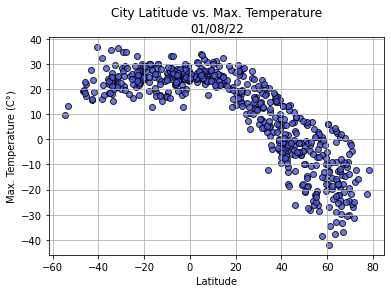

In [49]:
# Build the scatter plot for latitude vs. max temperature.
# rbg hex code 4b57db = warm blue
plt.scatter(lats,
            max_temps,
            color='#4b57db',
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max. Temperature\n'+ date)
plt.ylabel('Max. Temperature (C°)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.svg",
            format='svg',
            transparent=False,
            bbox_inches = "tight",
            facecolor="white")

# Show plot.
plt.show()

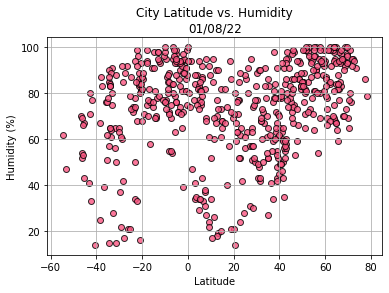

In [50]:
# Build the scatter plot for latitude vs. humidity.
# rbg hex code fb5581 = warm pink
plt.scatter(lats,
            humidity,
            color='#fb5581',
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity\n'+ date)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.svg",
            format='svg',
            transparent=False,
            bbox_inches = "tight",
            facecolor="white")

# Show plot.
plt.show()

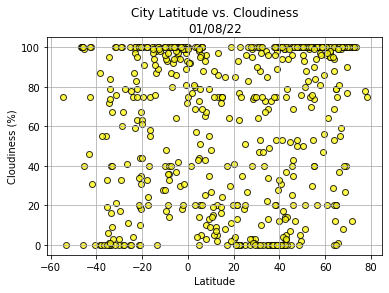

In [63]:
# Build the scatter plot for latitude vs. cloudiness.
# rbg hex code fff917 = sunny yellow
plt.scatter(lats,
            cloudiness,
            color='#fff917',
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness\n'+ date)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.svg",
            format='svg',
            transparent=False,
            bbox_inches = "tight",
            facecolor="white")

# Show plot.
plt.show()

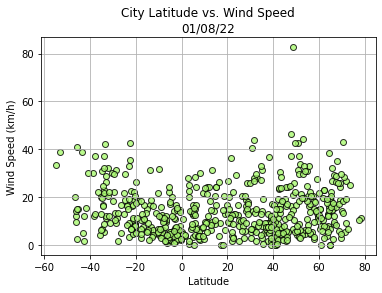

In [52]:
# Build the scatter plot for latitude vs. wind speed.
# rbg hex code a9f971 = spring green
plt.scatter(lats,
            wind_speed,
            color='#a9f971',
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed\n'+ date)
plt.ylabel('Wind Speed (km/h)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig4.svg",
            format='svg',
            transparent=False,
            bbox_inches = "tight",
            facecolor="white")

# Show plot.
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date (datetime format),Wind Speed (km/h)
0,0,Hilo,US,2022-01-08 22:10:37,19.7297,-155.0900,26.85,69,20,4.63,2022-01-08 22:10:37,16.668
2,2,Leh,IN,2022-01-08 22:10:40,34.1667,77.5833,-12.11,78,98,2.59,2022-01-08 22:10:40,9.324
4,4,Jamestown,US,2022-01-08 22:09:46,42.0970,-79.2353,-1.10,35,0,3.13,2022-01-08 22:09:46,11.268
9,9,Kodiak,US,2022-01-08 22:10:43,57.7900,-152.4072,0.73,69,100,5.14,2022-01-08 22:10:43,18.504
10,10,Merke,KZ,2022-01-08 22:10:43,42.8728,73.1786,1.52,58,3,1.87,2022-01-08 22:10:43,6.732


In [18]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date (datetime format),Wind Speed (km/h)
1,1,Busselton,AU,2022-01-08 22:10:40,-33.6500,115.3333,15.02,61,16,5.95,2022-01-08 22:10:40,21.420
3,3,Rikitea,PF,2022-01-08 22:10:40,-23.1203,-134.9692,25.49,78,100,9.14,2022-01-08 22:10:40,32.904
5,5,Japura,ID,2022-01-08 22:10:41,-0.3167,102.3500,22.98,99,93,0.61,2022-01-08 22:10:41,2.196
6,6,Palu,ID,2022-01-08 22:10:41,-0.8917,119.8707,23.55,86,100,0.83,2022-01-08 22:10:41,2.988
7,7,Bluff,NZ,2022-01-08 22:10:42,-46.6000,168.3333,19.33,70,100,5.56,2022-01-08 22:10:42,20.016


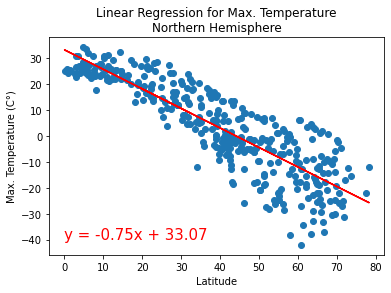

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for Max. Temperature\nNorthern Hemisphere', 'Max. Temperature (C°)',(0,-40))

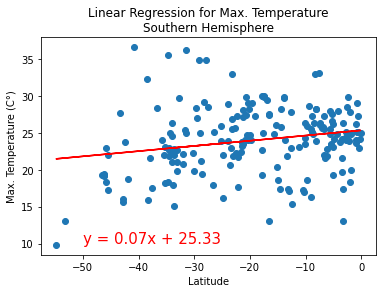

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for Max. Temperature\nSouthern Hemisphere', 'Max. Temperature (C°)',(-50,10))

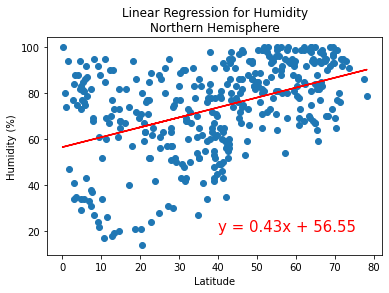

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for Humidity\nNorthern Hemisphere', 'Humidity (%)',(40,20))

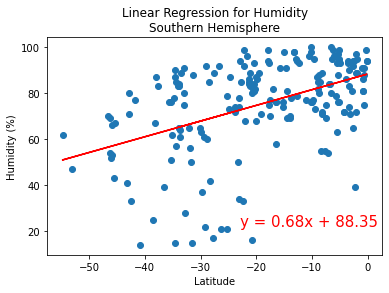

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for Humidity\nSouthern Hemisphere', 'Humidity (%)',(-23,22))

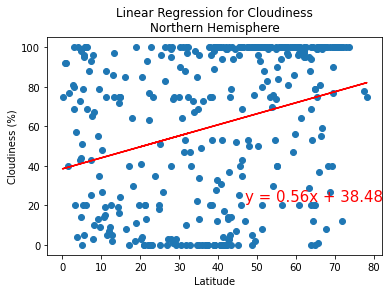

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for Cloudiness\nNorthern Hemisphere', 'Cloudiness (%)',(47,22))

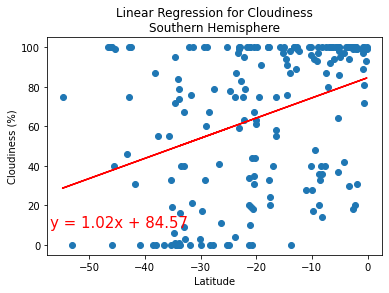

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for Cloudiness\nSouthern Hemisphere', 'Cloudiness (%)',(-57,9))

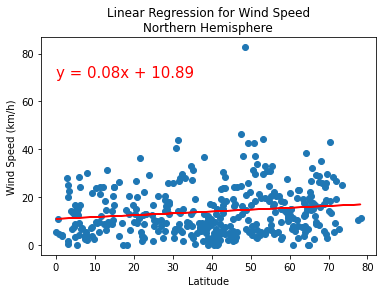

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed (km/h)"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for Wind Speed\nNorthern Hemisphere', 'Wind Speed (km/h)',(0,70))

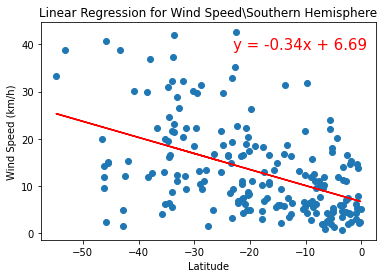

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed (km/h)"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for Wind Speed\Southern Hemisphere', 'Wind Speed (km/h)',(-23,39))